<a href="https://colab.research.google.com/github/ououkhin63/CE9010_2018/blob/master/Handwritten_char_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [4]:
from google.colab import files
  
  
uploaded = files.upload()

Saving A_Z Handwritten Data.csv to A_Z Handwritten Data.csv


In [10]:
data=pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [11]:
print(data.head())

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[5 rows x 785 columns]


In [12]:
X=data.drop('0',axis=1)
y=data['0']
print(X.head())
print(y.head())

   0.1  0.2  0.3  0.4  0.5  0.6  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[5 rows x 784 columns]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float32


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train=np.reshape(X_train.values, (X_train.shape[0],28,28))
X_test=np.reshape(X_test.values,(X_test.shape[0],28,28))

print('Train Data shape:',X_train.shape)
print('Test Data shape:',X_test.shape)

Train Data shape: (297960, 28, 28)
Test Data shape: (74490, 28, 28)


In [18]:
char_dict={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [20]:
y_int=np.int0(y)
count=np.zeros(26,dtype='int')

for i in y_int:
  count[i]+=1

alphabets=[]
for i in char_dict.values():
  alphabets.append(i)

print(count)

[13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]


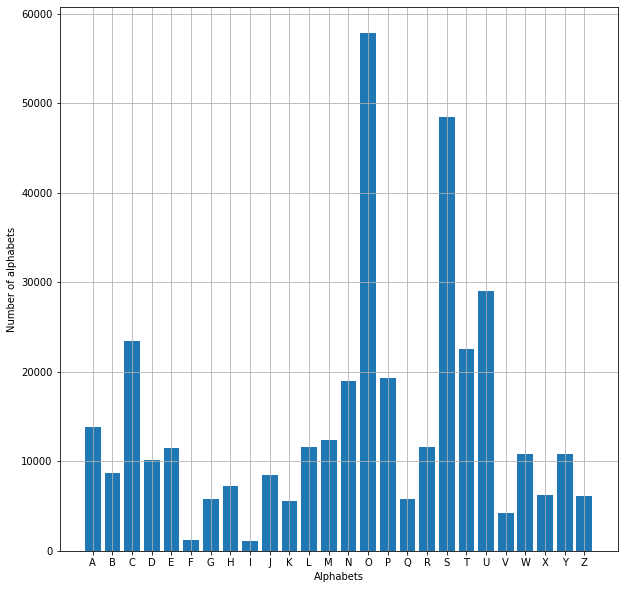

In [22]:
fig, ax=plt.subplots(1,1,figsize=(10,10))
ax.bar(alphabets,count)

plt.ylabel('Number of alphabets')
plt.xlabel('Alphabets')
plt.grid()
plt.show()

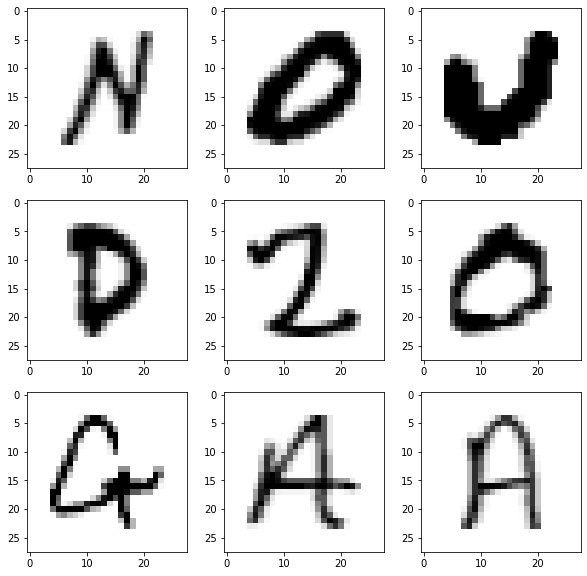

In [24]:
shuff = shuffle(X_train[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [25]:
train_X=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
test_X=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

print('New shape of train data:',train_X.shape)

print('New shape of test data:',test_X.shape)


New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [27]:
train_yCat=to_categorical(y_train,num_classes=26,dtype='int')
test_yCat=to_categorical(y_test,num_classes=26,dtype='int')

print('New shape of train labels:',train_yCat.shape)

print('New shape of test labels:',test_yCat.shape)


New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_X,train_yCat,epochs=1,validation_data=(test_X,test_yCat))

9312/9312 [==============================] - 404s 42ms/step - loss: 0.3351 - accuracy: 0.9122 - val_loss: 0.0750 - val_accuracy: 0.9803


In [33]:
model.summary()
model.save(r'model_char.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [34]:
print('The validation accuracy is:',history.history['val_accuracy'])
print('The training accuracy is:',history.history['accuracy'])
print('The validation loss is:',history.history['val_loss'])
print('The training loss is :',history.history['loss'])


The validation accuracy is: [0.9802523851394653]
The training accuracy is: [0.9573365449905396]
The validation loss is: [0.0750197023153305]
The training loss is : [0.15237268805503845]


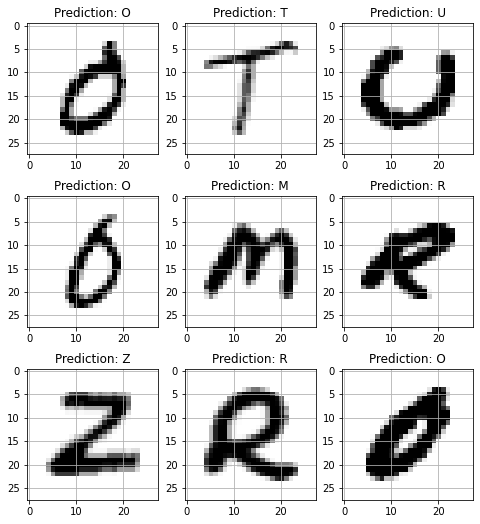

In [39]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = char_dict[np.argmax(test_yCat[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [61]:
from google.colab import files
  
  
uploaded = files.upload()

Saving m.jpg to m (1).jpg


In [64]:
img=cv2.imread('m.jpg')
img_copy=img.copy()

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(400,400))


In [65]:
img_copy=cv2.GaussianBlur(img_copy,(7,7),0)
img_gray=cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
_, img_thresh=cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)

img_final=cv2.resize(img_thresh,(28,28))
img_final=np.reshape(img_final,(1,28,28,1))



Text(0.5, 1.0, 'Prediction:T')

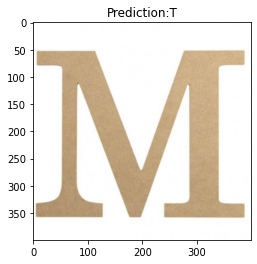

In [66]:
img_pred=char_dict[np.argmax(model.predict(img_final))]

plt.imshow(img)
plt.title('Prediction:'+img_pred)

#cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
#cv2.imshow('Handwritten character recognition', img)

In [54]:
from google.colab import files
  
  
uploaded = files.upload()

Saving K.jpg to K.jpg


Text(0.5, 1.0, 'Prediction:K')

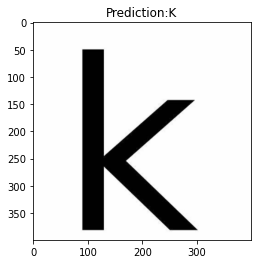

In [67]:
img=cv2.imread('K.jpg')
img_copy=img.copy()

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(400,400))
img_copy=cv2.GaussianBlur(img_copy,(7,7),0)
img_gray=cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
_, img_thresh=cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)

img_final=cv2.resize(img_thresh,(28,28))
img_final=np.reshape(img_final,(1,28,28,1))
img_pred=char_dict[np.argmax(model.predict(img_final))]

plt.imshow(img)
plt.title('Prediction:'+img_pred)

In [68]:
from google.colab import files
  
  
uploaded = files.upload()

Saving M.jpg to M.jpg


Text(0.5, 1.0, 'Prediction:N')

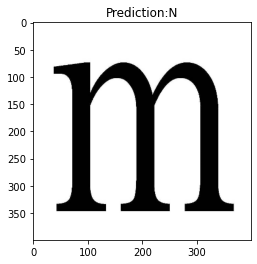

In [70]:
img=cv2.imread('M.jpg')
img_copy=img.copy()

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(400,400))
img_copy=cv2.GaussianBlur(img_copy,(7,7),0)
img_gray=cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
_, img_thresh=cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)

img_final=cv2.resize(img_thresh,(28,28))
img_final=np.reshape(img_final,(1,28,28,1))
img_pred=char_dict[np.argmax(model.predict(img_final))]

plt.imshow(img)
plt.title('Prediction:'+img_pred)